In [1]:
%run Latex_macros.ipynb

<IPython.core.display.Latex object>

Macro `_latex_std_` created. To execute, type its name (without quotes).
=== Macro contents: ===
get_ipython().run_line_magic('run', 'Latex_macros.ipynb')
 no stored variable _latex_std_


$$
\newcommand{\o}{\mathbf{o}}
$$


In [2]:
# My standard magic !  You will see this in almost all my notebooks.

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Reload all modules imported with %aimport
%load_ext autoreload
%autoreload 1
%matplotlib inline

In [3]:
# Standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Common imports
import os

import mnist_helper
%aimport mnist_helper

mnh = mnist_helper.MNIST_Helper()

import class_helper
%aimport class_helper

clh= class_helper.Classification_Helper()

import training_models_helper as tmh
%aimport training_models_helper

tm = tmh.TrainingModelsHelper()

# Logistic regression as Linear Regression of log odds

We can demonstrate a relationship between Logistic Regression and Linear Regression.

Recall the mapping of the score $\Theta^T \x$ into probabilities

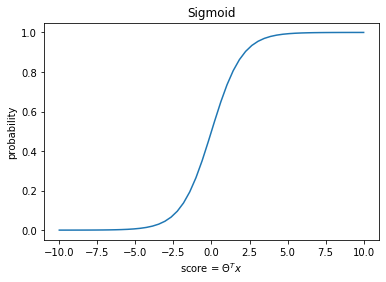

In [4]:
s = np.linspace(-10,10, 50)
sigma_s = 1/(1 + np.exp(- s))

fig = plt.figure()
ax  = fig.add_subplot(1,1,1)
_= ax.plot(s, sigma_s)
_= ax.set_title("Sigmoid")
_= ax.set_xlabel("score = $\Theta^T x$")
_= ax.set_ylabel("probability")

Certainly doesn't look like a linear relationship between scores and probability.

Define the *odds* $\o^\ip$ of example $i$ being in class 1 as
$$\o^\ip = \frac{\hat{p}^\ip}{1 - \hat{p}^\ip}$$
- the odds is just the ratio of the probability of being in class $1$ versus not being in class $1$

- **Note** this is called the *odds* **not** the odds ratio !
    - *odds ratio* is the ratio of two odds

Let's graph the relationship between scores $\Theta^T \x$ and the *log of the odds*.

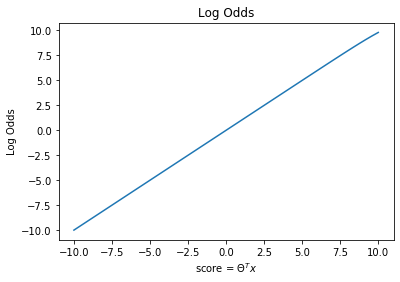

In [5]:
s = np.linspace(-10,10, 50)
sigma_s = 1/(1 + np.exp(- s))

p = sigma_s
epsilon = 10e-6

odds = p/(1 - p + epsilon)
log_odds = np.log(odds)

fig = plt.figure()
ax  = fig.add_subplot(1,1,1)
_= ax.plot(s, log_odds)
_= ax.set_title("Log Odds")
_= ax.set_xlabel("score = $\Theta^T x$")
_= ax.set_ylabel("Log Odds")

Linear !

So you can implement Logistic Regression as Linear Regression of the log odds versus features $\x$

This is similar in spirit to our transforming the "curvy" data set of the previous lesson
- there, we transformed features to obtain a linear relationship
- here we transformed the target

So the Logistic Regression equation is the linear equation
 $$\log(\o) = \Theta^T \x + \epsilon$$
   

In words:
- Logistic Regression is Linear Regression to predict log odds, given features $\x$ 

Knowing that the regression produces log odds will
become very useful in interpreting coefficients $\Theta$.

(Coming attraction: a unit change in $\Theta_j$ results in a *multiplicative* increase in odds)

### Log odds are normally distributed

Let's examine the distribution of log odds.

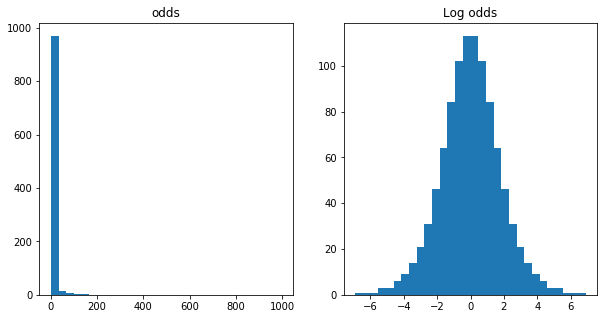

In [6]:
tf = tmh.TransformHelper()
tf.plot_odds()

- Log of the odds  is normally distributed
- Linear Regression errors will be normally distributed, satisfying model's mathematical assumptions 

## Logistic Regression as Linear Regression on the log odds: complication

Turns out you can't solve for the $\Theta$ in Logistic Regression by minimizing the RMSE cost function.
- Observe that
    - the log odds $\log(\frac{\hat{p}}{1 - \hat{p}}) =  \infty$ is  at $\hat{p} = 1$
    - the log odds $\log(\frac{\hat{p}}{1 - \hat{p}}) = - \infty$ is  at $\hat{p} = 0$

This will give infinite errors.

There is an alternate solution to Linear Regression using *Maximum Likelihood* which doesn't have
this issue.

n.b., Minimizing RMSE produces a Maximum Likelihood estimate of $\Theta$.

In [7]:
print("Done")

Done
